In [1]:
folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_stressed'

In [2]:
mkdir $folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_stressed': File exists


In [3]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

import flotilla
study = flotilla.embark('singlecell_pnms_figure5')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

2015-09-30 09:46:08	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnms_figure5/datapackage.json
2015-09-30 09:46:08	Parsing datapackage to create a Study object
2015-09-30 09:47:23	Initializing Study
2015-09-30 09:47:23	Initializing Predictor configuration manager for Study
2015-09-30 09:47:23	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-09-30 09:47:23	Added ExtraTreesClassifier to default predictors
2015-09-30 09:47:23	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-09-30 09:47:23	Added ExtraTreesRegressor to default predictors
2015-09-30 09:47:23	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-09-30 09:47:23	Added GradientBoostingClassifier to default predictors
2015-09-30 09:47:23	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.Gradie

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [4]:
study.splicing.data.head()

,chr10:101476219-101480743:-|3p,chr10:101476219-101480743:-|5p,chr10:101478258-101480743:-|3p,chr10:101478258-101480743:-|5p,chr10:101486829-101487197:-|3p,chr10:101486829-101487197:-|5p,chr10:101486912-101487197:-|3p,chr10:101486912-101487197:-|5p,chr10:102021821-102045853:-|3p,chr10:102021821-102045853:-|5p,...,chrY:2722813-2734833:+|3p,chrY:2722813-2734833:+|5p,chrY:2722813-2789783:+|3p,chrY:2722813-2789783:+|5p,chrY:2722813-2796904:+|3p,chrY:2722813-2796904:+|5p,chrY:2733287-2734833:+|3p,chrY:2733287-2734833:+|5p,chrY:2733362-2734833:+|3p,chrY:2733362-2734833:+|5p
sample_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
CVN_05,0,0,1,1,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


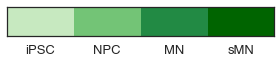

In [6]:
phenotype_order = ['iPSC', 'NPC', 'MN', 'sMN']
phenotype_colors = pd.Series([study.phenotype_to_color[p] for p in phenotype_order], index=phenotype_order)
sns.palplot(phenotype_colors)
ax = plt.gca()
ax.set(xticks=np.arange(phenotype_colors.shape[0]), xticklabels=phenotype_order)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/phenotype_colors.pdf'.format(folder))

In [ ]:
[x for x in psi.index if 'MSA' in x]

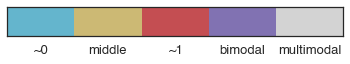

In [7]:
from modish.visualize import MODALITY_ORDER, MODALITY_PALETTE

sns.palplot(MODALITY_PALETTE)
ax = plt.gca()
ax.set(xticks=np.arange(len(MODALITY_PALETTE)), xticklabels=MODALITY_ORDER)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/modality_colors.pdf'.format(folder))

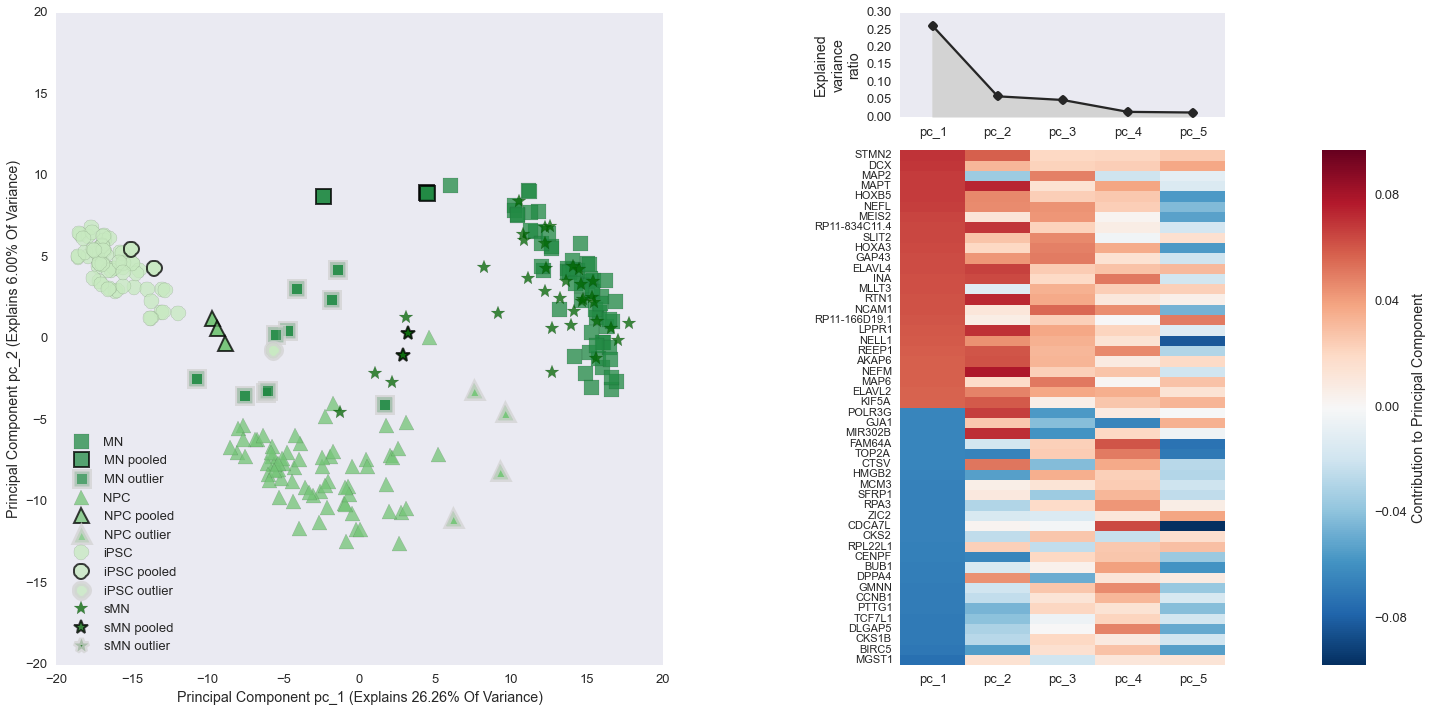

In [22]:
viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=15)
xmin, xmax, ymin, ymax = viz.ax_components.axis()
vmin = min(xmin, ymin)
vmax = max(xmax, ymax)
viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
viz.fig_reduced.savefig('{}/expression_pca.pdf'.format(folder))

In [9]:
neuron_singles_ids = study.sample_subset_to_sample_ids('neuron') & study.sample_subset_to_sample_ids('~pooled') \
    & study.sample_subset_to_sample_ids('~outlier')

neuron_singles_expression = study.expression.data.loc[neuron_singles_ids]
print 'neuron_singles_expression.shape', neuron_singles_expression.shape
neuron_singles_splicing = study.splicing.data.loc[neuron_singles_ids].dropna(axis=1, thresh=20)
print 'neuron_singles_splicing.shape', neuron_singles_splicing.shape

neuron_singles_expression.shape (94, 16691)
neuron_singles_splicing.shape (94, 39226)


In [10]:
neuron_singles_expression = neuron_singles_expression.loc[:, (neuron_singles_expression > 1).sum() >= 20]

In [11]:
from flotilla.compute.expression import differential_expression

de_results = differential_expression(neuron_singles_expression, study.sample_id_to_phenotype)

In [ ]:
p_cutoff = 1e-5

fig, ax = plt.subplots(figsize=(4, 3))
sns.distplot(np.log10(de_results.bonferonni_p_value), kde=False, color='grey')

ax.set(xlabel='$\log_{10}(q)$', ylabel='Count')
ymin, ymax = ax.get_ylim()
ax.vlines(p_cutoff, 0, ymax, linestyle='dotted', linewidth=3)
ax.set(ylim=(0, ymax), title='MN vs Stressed MN')
sns.despine()
fig.tight_layout()
ax.locator_params(nbins=4)
fig.savefig('{}/neurons_vs_stressed_bonferonni_p_value.pdf'.format(folder))

In [13]:

non_de_genes = de_results.gene_id[de_results.bonferonni_p_value >= p_cutoff]
de_genes = de_results.gene_id[de_results.bonferonni_p_value < p_cutoff]
print len(non_de_genes)
print len(de_genes)

11864
28


In [14]:
voyages_xlabel = study.splicing._nmf_space_xlabel(study.sample_id_to_phenotype)

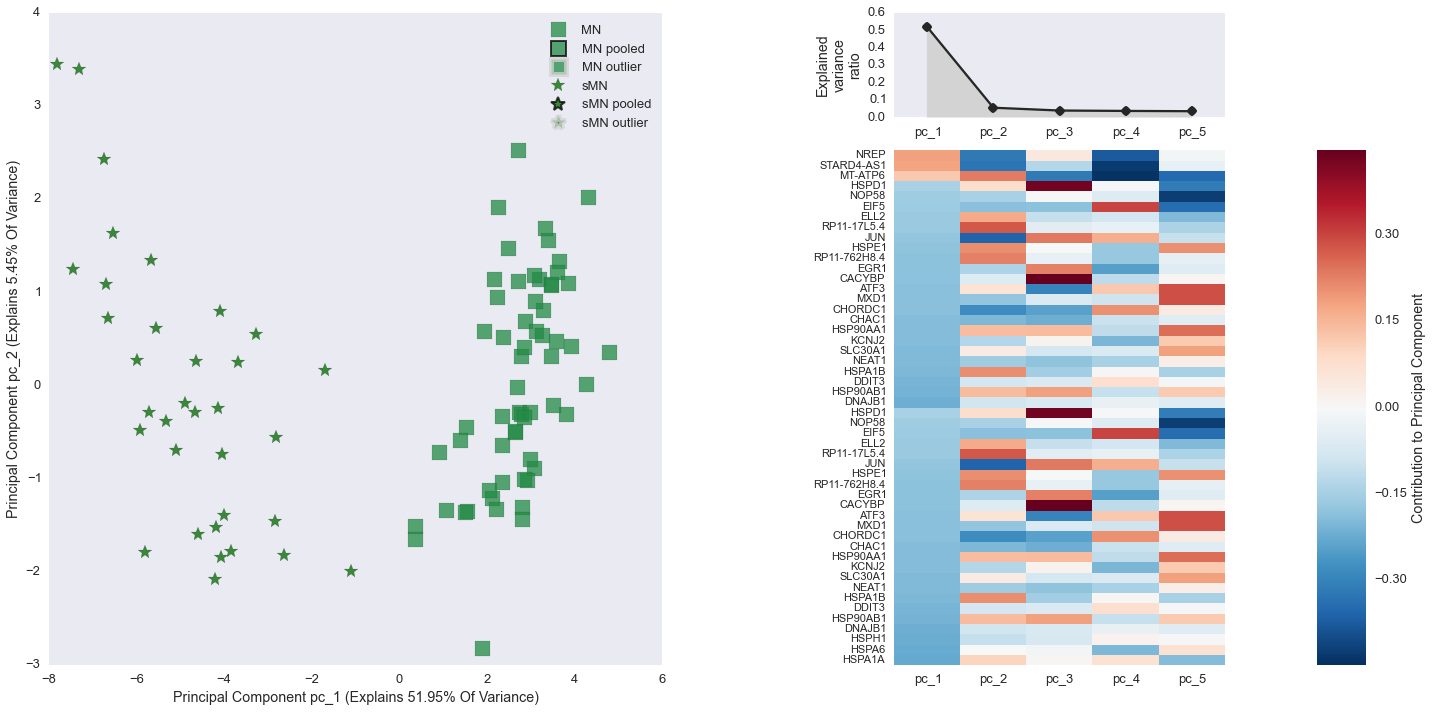

In [23]:
with sns.axes_style('dark'):
    study.plot_pca(sample_subset=neuron_singles_ids, feature_subset=de_genes, show_vectors=False, markersize=15)

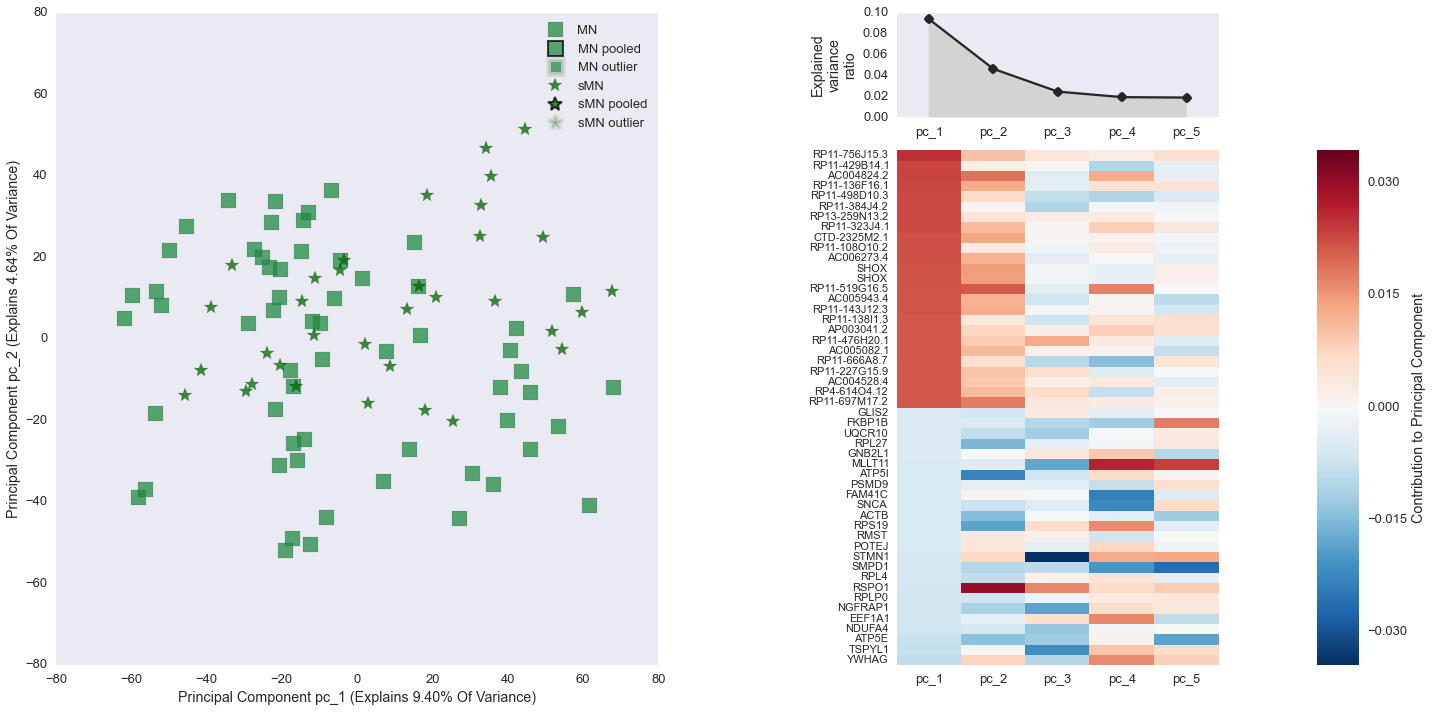

In [24]:
sns.set(style='dark', context='talk')

viz = study.plot_pca(sample_subset=neuron_singles_ids, feature_subset=non_de_genes, show_vectors=False, markersize=15)
xmin, xmax, ymin, ymax = viz.ax_components.axis()
vmin = min(xmin, ymin)
vmax = max(xmax, ymax)
viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
viz.fig_reduced.savefig('{}/neurons_vs_stressed_constitutive_genes_expression_pca.pdf'.format(folder))

In [26]:
event_ind = study.splicing.feature_data.ensembl_id.map(
    lambda x: non_de_genes.isin(x.split(',')).any() if isinstance(x, str) else False)

non_de_event_names = study.splicing.feature_data.index[event_ind]
print len(non_de_event_names)

33534


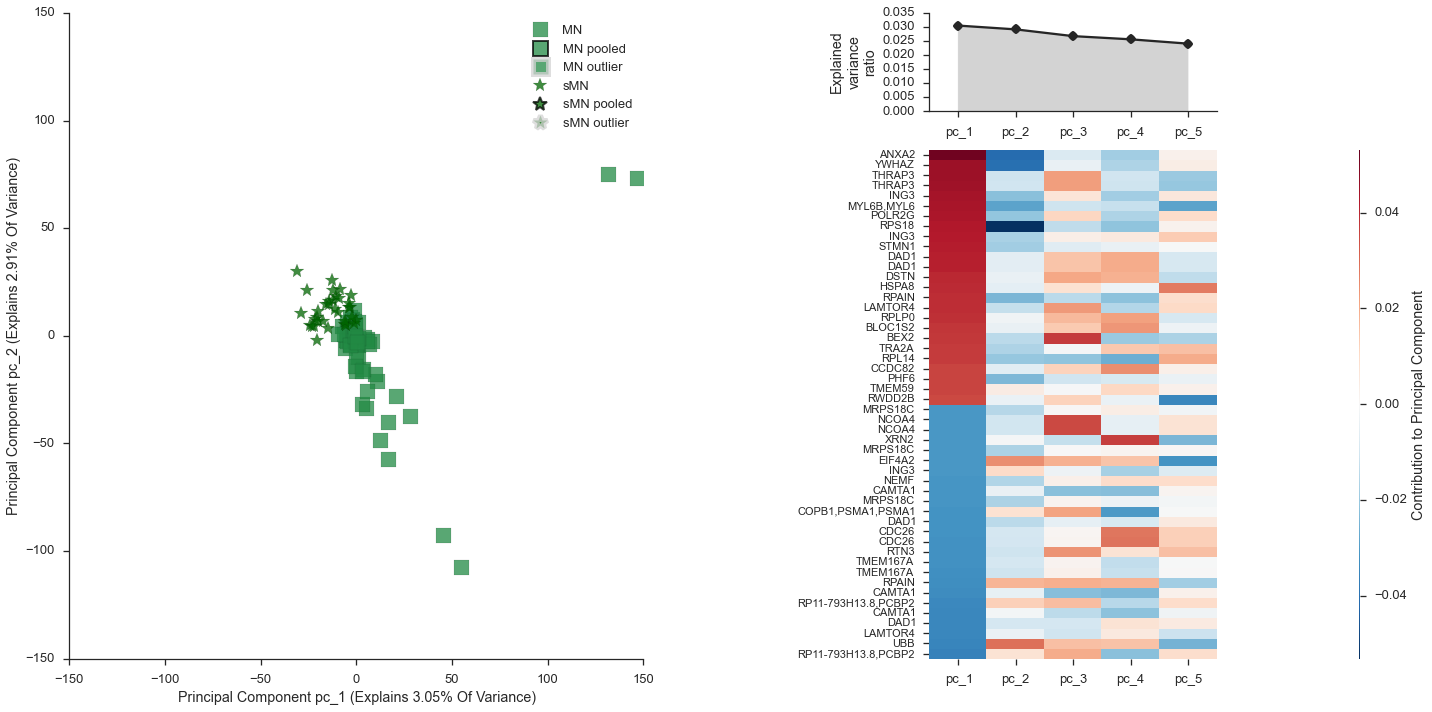

In [31]:
sns.set(style='ticks', context='talk')
viz = study.plot_pca(sample_subset=neuron_singles_ids, 
                     feature_subset=non_de_event_names, 
                     show_vectors=False, data_type='splicing', markersize=15)
xmin, xmax, ymin, ymax = viz.ax_components.axis()
vmin = min(xmin, ymin)
vmax = max(xmax, ymax)
viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
viz.fig_reduced.savefig('{}/neurons_vs_stressed_constitutive_genes_splicing_pca.pdf'.format(folder))

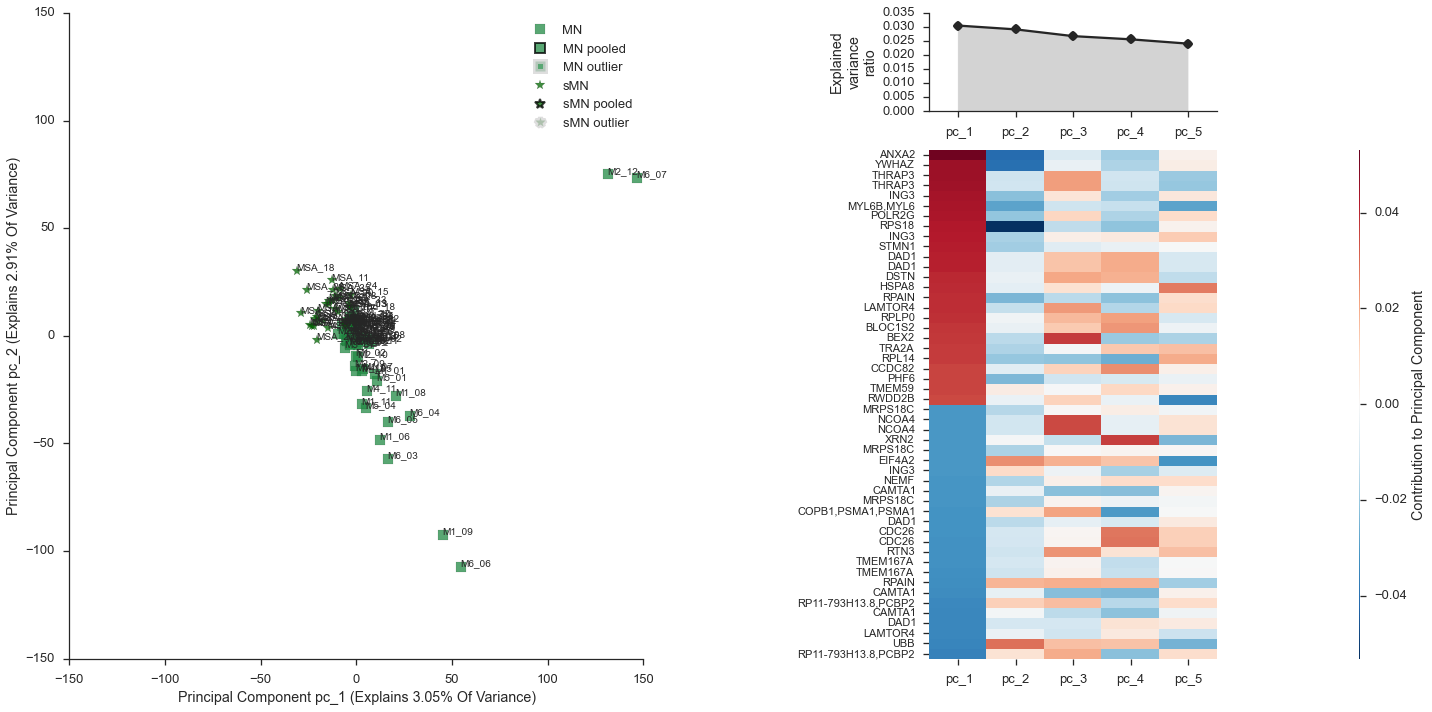

In [32]:
sns.set(style='ticks', context='talk')
viz = study.plot_pca(sample_subset=neuron_singles_ids, 
                     feature_subset=non_de_event_names, 
                     show_vectors=False, data_type='splicing', show_point_labels=True)
xmin, xmax, ymin, ymax = viz.ax_components.axis()
vmin = min(xmin, ymin)
vmax = max(xmax, ymax)
viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
viz.fig_reduced.savefig('{}/neurons_vs_stressed_constitutive_genes_splicing_pca_points_labeled.pdf'.format(folder))

In [33]:
components = viz.components_.ix[:2, :]
components = components.rename(index={'pc_1': "PC 1", 'pc_2': "PC 2"})
components = components.T
components.head()

,PC 1,PC 2
chr1:154144568-154148590:-|3p,2.998829e-05,-2.429079e-04
chr6:99854045-99855956:-|5p,-9.227598e-17,2.956989e-17
chr15:78833178-78834246:+|5p,-1.492044e-03,2.660394e-03
chr14:60619897-60620676:-|3p,5.168245e-17,-8.040533e-18
chr1:154143965-154145383:-|5p,-1.783585e-02,-1.382497e-02


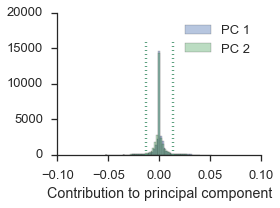

In [34]:
sns.set(context='talk', style='ticks')
fig, ax = plt.subplots(figsize=(4, 3))
colors = sns.color_palette('deep')

for color, (pc, column) in zip(colors, components.iteritems()):
    sns.distplot(column, label=pc, hist=True, kde=False, color=color)
    ymin, ymax = ax.get_ylim()
    x = column.abs().mean() + 2*column.abs().std()
    ax.vlines(x, 0, ymax, alpha=0.75, linestyle='dotted', color=color)
    ax.vlines(-x, 0, ymax, alpha=0.75, linestyle='dotted', color=color)
ax.set(xlabel='Contribution to principal component')
ax.locator_params(nbins=4)
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/neurons_vs_stressed_constitutive_genes_splicing_pca_components.pdf'.format(folder))

In [35]:
big_components = components[components > components.abs().mean() + 2*components.abs().std()].dropna(how='all')
print big_components.shape
big_components.head()

(1211, 2)


,PC 1,PC 2
chr1:52981727-53018602:-|5p,0.029968,0.017102
chr1:203764923-203765420:+|3p,0.023479,NaN
chr2:190650198-190656515:+|5p,0.022076,0.022700
chr15:25362663-25363417:+|5p,NaN,0.013810
chr8:87554303-87556967:+|3p,0.023530,0.028871


In [36]:
asdf = neuron_singles_splicing.groupby(study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=20, axis=1))
asdf.shape

(94, 39226)

In [37]:
neuron_singles_splicing.shape

(94, 39226)

### Modality calcluation

In [ ]:
estimator = modish.ModalityEstimator()
%time modality_scores = neuron_singles_splicing.groupby(study.sample_id_to_phenotype).apply(estimator.fit_transform)

In [ ]:
modality_scores.head()

In [ ]:
modality_scores.loc['sMN']

In [ ]:
modality_scores_tidy = pd.melt(modality_scores.reset_index(), id_vars=['phenotype', 'level_1'], 
                               var_name='event_name', value_name='log2_bayes_factor')
modality_scores_tidy = modality_scores_tidy.rename(columns={'level_1': 'modality'})
modality_scores_tidy = modality_scores_tidy.dropna()
print modality_scores_tidy.shape
modality_scores_tidy.head()

#### Assign most likely modality

In [ ]:

%time modality_assignments = modality_scores.groupby(level=0, axis=0).apply(estimator.assign_modalities, reset_index=True)
modality_assignments
modalities_tidy = modality_assignments.unstack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_0': 'event_name', 0:'modality'})
modalities_tidy = modalities_tidy.dropna()
modalities_tidy.head()

In [ ]:
modalities_tidy_stressed = modalities_tidy.loc[modalities_tidy.phenotype == 'sMN']

In [ ]:
study.supplemental.modalities_tidy = pd.concat([study.supplemental.modalities_tidy, modalities_tidy_stressed])
study.supplemental.modalities_tidy.head()

In [ ]:
study.save('singlecell_pnms_figure5_post_modality')

## Restart here

In [ ]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

import flotilla
study = flotilla.embark('singlecell_pnms_figure5_post_modality')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

In [ ]:
phenotype_order = ['iPSC', 'NPC', 'MN', 'sMN']

In [ ]:
from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE

import locale


locale.setlocale(locale.LC_ALL, 'en_US')

modality_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size().reset_index()
modality_counts = modality_counts.rename(columns={0:'n_events'})
modality_counts
modality_counts['Percentage of events'] = modality_counts.groupby('phenotype').n_events.apply(
    lambda x: 100*x/x.astype(float).sum())
modality_counts.head()

def annotate_bars(x, y, **kwargs):
    data = kwargs.pop('data')
    ax = plt.gca()
    width = 0.8/5.
    x_base = -.49 - width/2.5
    for phenotype, phenotype_df in data.groupby('phenotype'):
        i = 0
        for modality, modality_df in phenotype_df.groupby('modality'):
            i += 1
            x_position = x_base + width*i + width/2
            y_position = modality_df["Percentage of events"]
            try:
                value = modality_df.n_events.values[0]
                formatted = locale.format('%d', value, grouping=True)
                ax.annotate(formatted, (x_position, y_position),
                            textcoords='offset points', xytext=(0, 2),
                            ha='center', va='bottom', fontsize=12)
            except IndexError:
                continue
        x_base += 1

modality_factorplot_kws = dict(hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE)

modality_counts.modality = pd.Categorical(modality_counts.modality, categories=MODALITY_ORDER, ordered=True)
modality_counts.phenotype = pd.Categorical(modality_counts.phenotype, categories=phenotype_order, ordered=True)
g = sns.factorplot(y='Percentage of events', x='phenotype', hue='modality', kind='bar', data=modality_counts,
                   aspect=3, 
                   legend=False, linewidth=1, size=3, **modality_factorplot_kws)
g.map_dataframe(annotate_bars, 'phenotype', 'Percentage of events')
g.add_legend(label_order=MODALITY_ORDER, title='Modalities')
for ax in g.axes.flat:
#     ax.set_ylim(0, 50)
    ax.locator_params('y', nbins=5)
g.savefig('{}/modalities_bar_percentage_stressed.pdf'.format(folder))


In [ ]:
sj_metadata = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/sj_metadata.csv', index_col=0)
# sj_metadata.head()
modalities_annotated = study.supplemental.modalities_tidy.join(sj_metadata, on='event_name')
modalities_annotated.head()

In [ ]:
expression_feature_data = pd.read_csv('/home/obotvinnik/flotilla_projects/singlecell_pnm_0.3/expression_feature.csv.gz', 
                          index_col=0, compression='gzip')
expression_feature_data.head()

In [ ]:
join_cols = expression_feature_data.columns.difference(modalities_annotated.columns)
join_cols

In [ ]:
modalities_annotated = modalities_annotated.join(expression_feature_data[join_cols], on='one_ensembl_id')
modalities_annotated.head()

### Enrichment of boolean features

In [ ]:
phenotype_order = ['iPSC', 'NPC', 'MN', 'sMN']

#### Combine exon3p and 5p ancientness

In [ ]:
metadata_cols = (u'exon_5p_merkin2012_ancient', u'exon_3p_merkin2012_ancient')

exon_ancient_combined = pd.concat([sj_metadata[col].dropna() for col in metadata_cols])
print exon_ancient_combined.shape
exon_ancient_combined.name = 'merkin2012_ancient_exon'
if exon_ancient_combined.name not in modalities_annotated:
    modalities_annotated = modalities_annotated.join(exon_ancient_combined, on='event_name')
modalities_annotated.head()

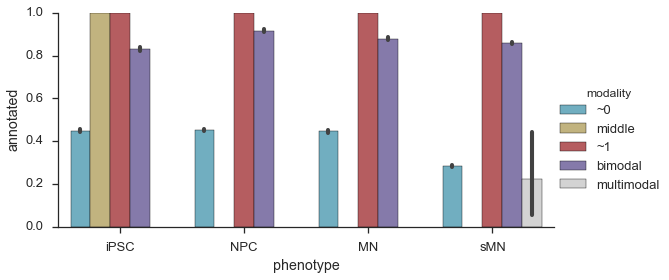

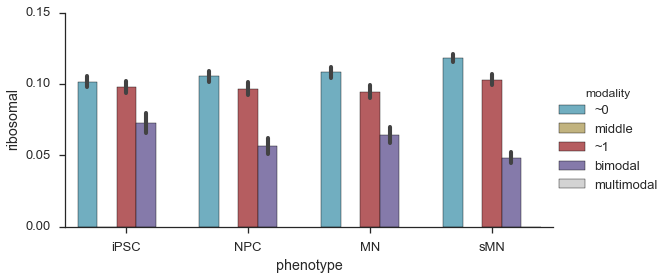

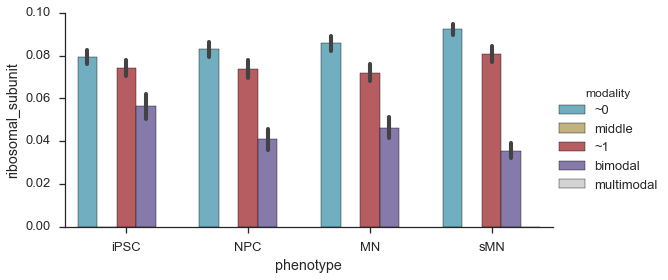

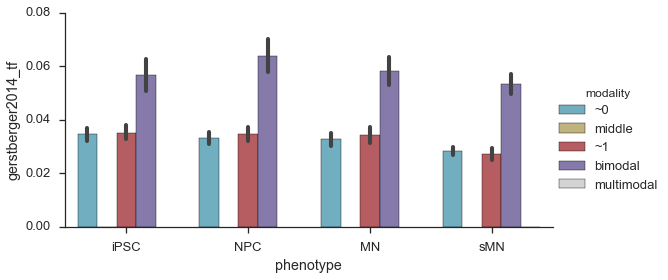

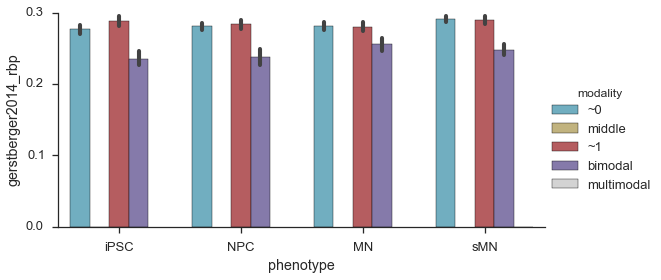

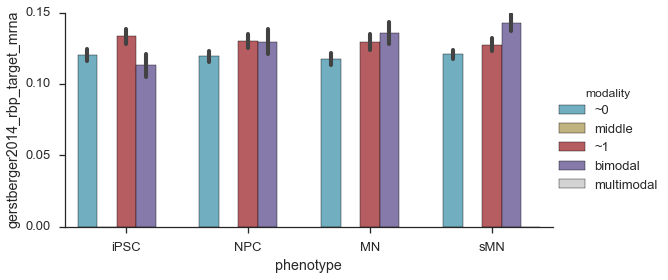

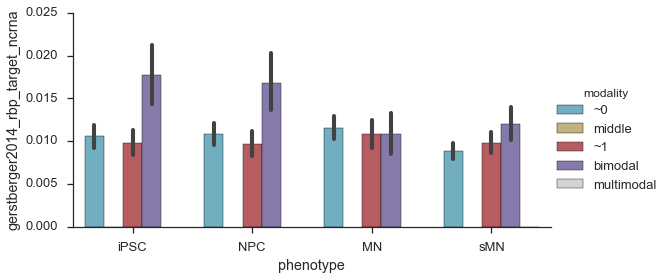

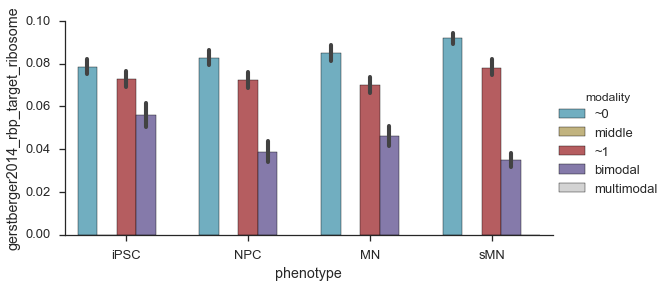

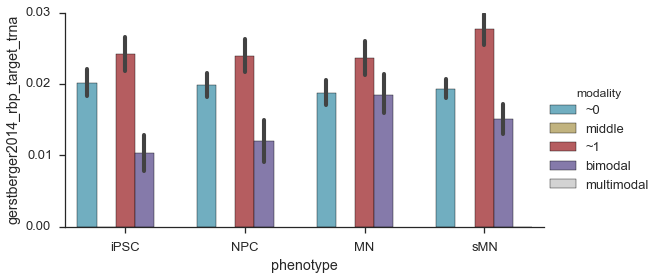

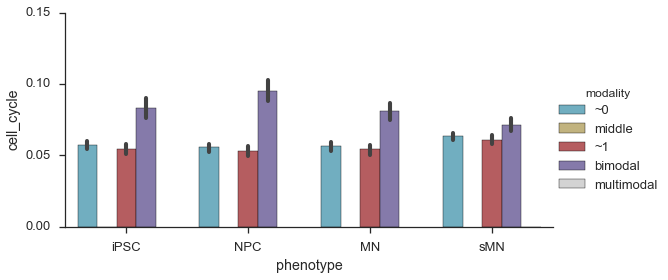

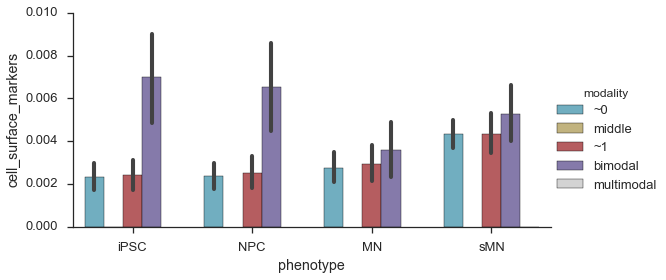

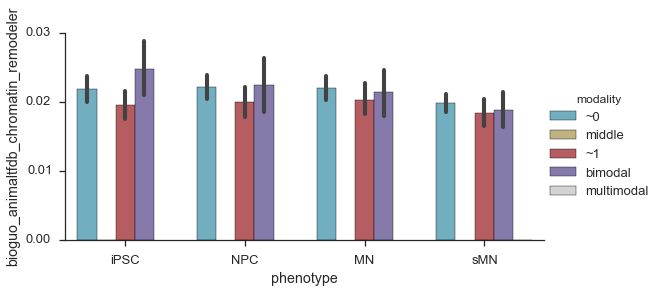

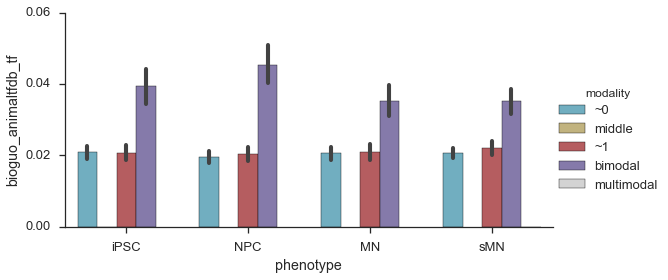

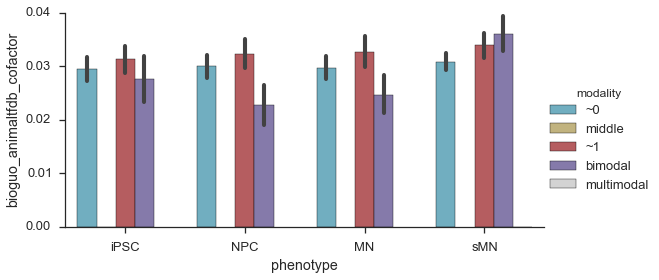

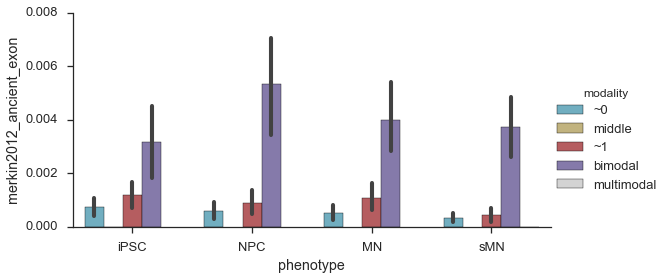

In [278]:
boolean_cols = ['annotated', 'ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'merkin2012_ancient_exon']

for col in boolean_cols:
    g = sns.factorplot(y=col, x='phenotype', hue='modality', data=modalities_annotated, 
                       aspect=2, kind='bar', size=4, hue_order=MODALITY_ORDER, palette=modality_palette,
                      x_order=phenotype_order)
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#     g.fig.tight_layout()
    g.savefig('{}/modalities_features_{}.pdf'.format(folder, col))

### Enrichment of numerical features

In [ ]:
max_n_exons_per_gene = pd.read_csv('/projects/ps-yeolab/genomes/hg19/gencode/v19/max_exons_per_gene.csv', squeeze=True,
                                  index_col=0, header=None)
max_n_exons_per_gene.name = 'max_exons_per_gene'

# Convert to ensembl ids
max_n_exons_per_gene.index = max_n_exons_per_gene.index.map(lambda x: x.split('.')[0])
max_n_exons_per_gene.head()

In [ ]:
if max_n_exons_per_gene.name not in modalities_annotated:
    modalities_annotated = modalities_annotated.join(max_n_exons_per_gene, on='one_ensembl_id')
modalities_annotated.head()

In [ ]:
modalities_annotated.columns

#### Combine 5' and 3' exon conservation

In [ ]:
metadata_cols = (u'exon_5p_phastcons_placental_mammal', u'exon_3p_phastcons_placental_mammal')

exon_conservation_combined = pd.concat([sj_metadata[col].dropna() for col in metadata_cols])
print exon_conservation_combined.shape
exon_conservation_combined.tail()

In [ ]:
# exon_conservation_combined = exon_conservation_combined.drop_duplicates()
exon_conservation_combined.name = 'exon_conservation'
if exon_conservation_combined.name not in modalities_annotated:
    modalities_annotated = modalities_annotated.join(exon_conservation_combined, on='event_name')
modalities_annotated.head()

In [ ]:
study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')


modalities_expression = modalities_annotated.merge(
    splicing_tidy_singles, left_on=['event_name', 'phenotype'], right_on=['event_name', 'phenotype'])
print modalities_expression.shape
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

modalities_expression['log2(TPM+1)'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

In [ ]:
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.mean(),
                           on=['event_name', 'sample_id'], rsuffix='_mean', lsuffix='_original')

modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_name', 'sample_id']).expression.var(),
                           on=['event_name', 'sample_id'], rsuffix='_var', lsuffix='_original')

In [ ]:
modalities_expression.head()

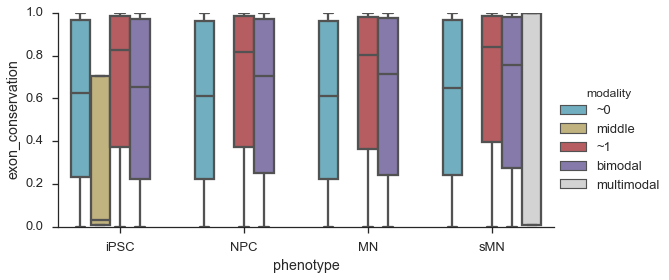

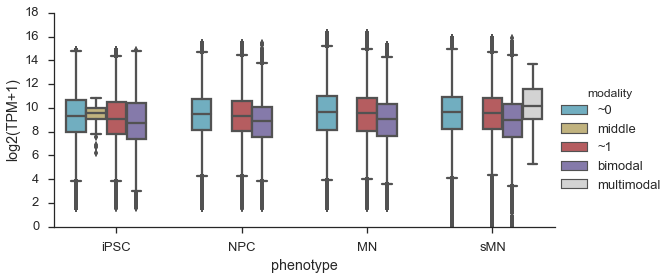

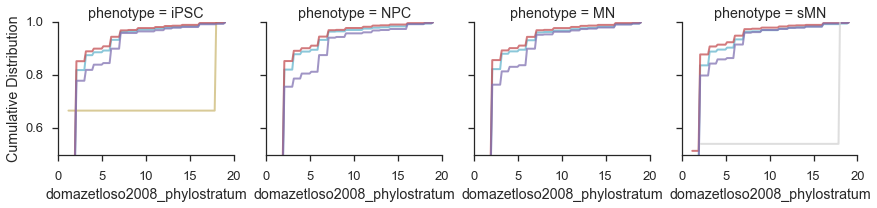

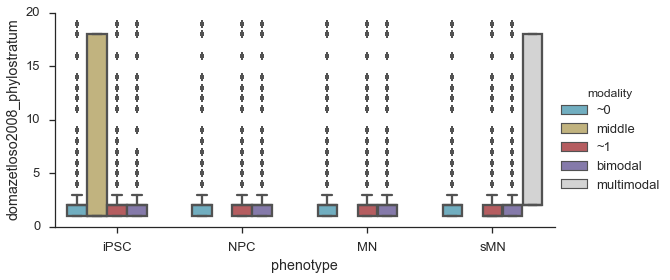

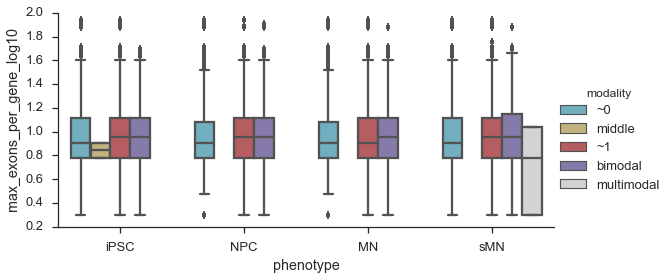

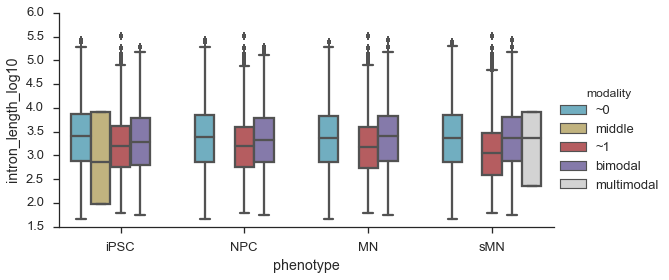

In [314]:
from flotilla.visualize.generic import cdfplot

numerical_cols = [u'exon_conservation', #r'$\log_2(TPM+1)$',
                  'log2(TPM+1)', 'expression_mean', 'expression_var'
                  u'domazetloso2008_phylostratum', 'max_exons_per_gene', 'intron_length']

log10_cols = ['max_exons_per_gene', 'intron_length']
cdf_cols = ['domazetloso2008_phylostratum']
log10s = True, False

plots = 'cdf', 'box'

for col in numerical_cols:
    for log10 in log10s:
        for plot in plots:
            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(modalities_expression,  col='phenotype', hue='modality', size=3,
                                   col_order=phenotype_order, hue_order=MODALITY_ORDER,
                                  palette=modality_palette, legend_out=True)
                g.map(cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    modalities_annotated[log_col] = np.log10(modalities_annotated[col])
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x='phenotype', hue='modality', data=modalities_expression, 
                                   kind=plot, aspect=2, order=phenotype_order, notch=True,
                                   hue_order=MODALITY_ORDER, palette=modality_palette)
            suffix = '' if not log10 else '_log10'
            g.savefig('{}/modalities_features_{}_{}{}.pdf'.format(folder, col, plot, suffix))

### GO enrichment

In [306]:
phenotype_order

['iPSC', 'NPC', 'MN', 'sMN']

In [309]:
study.supplemental.modalities_tidy['phenotype'] = \
    pd.Categorical(study.supplemental.modalities_tidy.phenotype, categories=phenotype_order, ordered=True)

In [310]:
ever_bimodal = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.modality == 'bimodal']
once_bimodal = study.supplemental.modalities_tidy.groupby('event_name').filter(
    lambda x: 'bimodal' in x.modality.values and x.modality.unique().shape[0] > 1)
print once_bimodal.shape
once_bimodal.head()

(26292, 3)


,event_name,phenotype,modality
0,chr10:101476219-101480743:-|3p,MN,~0
1,chr10:101476219-101480743:-|3p,NPC,bimodal
2,chr10:101476219-101480743:-|3p,iPSC,~0
3,chr10:101476219-101480743:-|5p,MN,~0
4,chr10:101476219-101480743:-|5p,NPC,bimodal


1343
(26, 9)
                              features_of_interest_in_go_term  \
GO:0000381  ENSG00000003756,ENSG00000173933,ENSG0000024864...   
GO:0043928  ENSG00000106355,ENSG00000204392,ENSG0000017532...   
GO:0043280  ENSG00000215301,ENSG00000256053,ENSG0000021425...   
GO:0042274  ENSG00000115268,ENSG00000137154,ENSG0000010519...   
GO:0032088  ENSG00000160310,ENSG00000134744,ENSG0000018824...   

                 features_of_interest_in_go_term_gene_symbols  \
GO:0000381  RBM5,RBM4,RBM14-RBM4,DDX5,RBMX,TRA2B,RBFOX2,RB...   
GO:0043928             LSM5,LSM2,LSM1,EXOSC8,EXOSC7,LSM7,DDX6   
GO:0043280                       DDX3X,APOPT1,FIS1,HMGB1,RHOA   
GO:0042274                  RPS15,RPS6,RPS16,RPS24,RPS7,RPS19   
GO:0032088           PRMT2,ZCCHC11,COMMD6,TAX1BP1,PSMD10,RPS3   

                     go_domain  \
GO:0000381  biological_process   
GO:0043928  biological_process   
GO:0043280  biological_process   
GO:0042274  biological_process   
GO:0032088  biological_process   



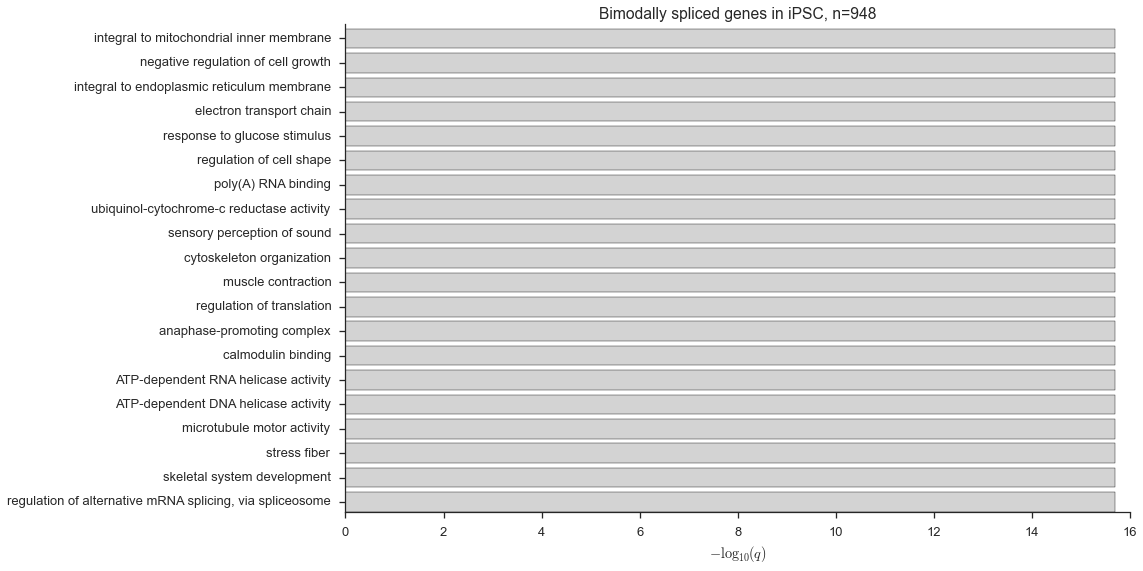

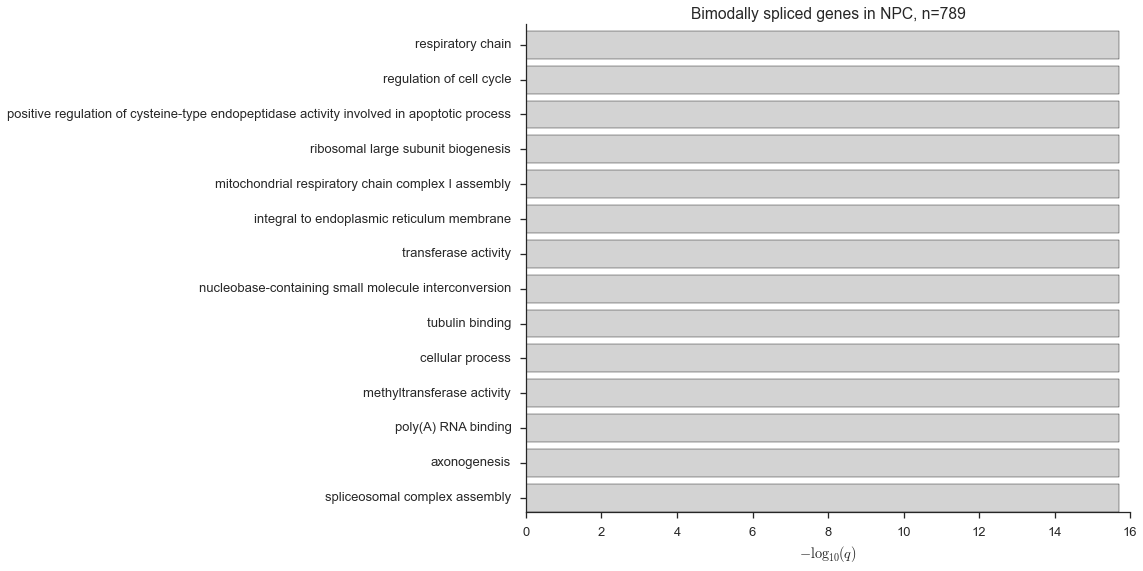

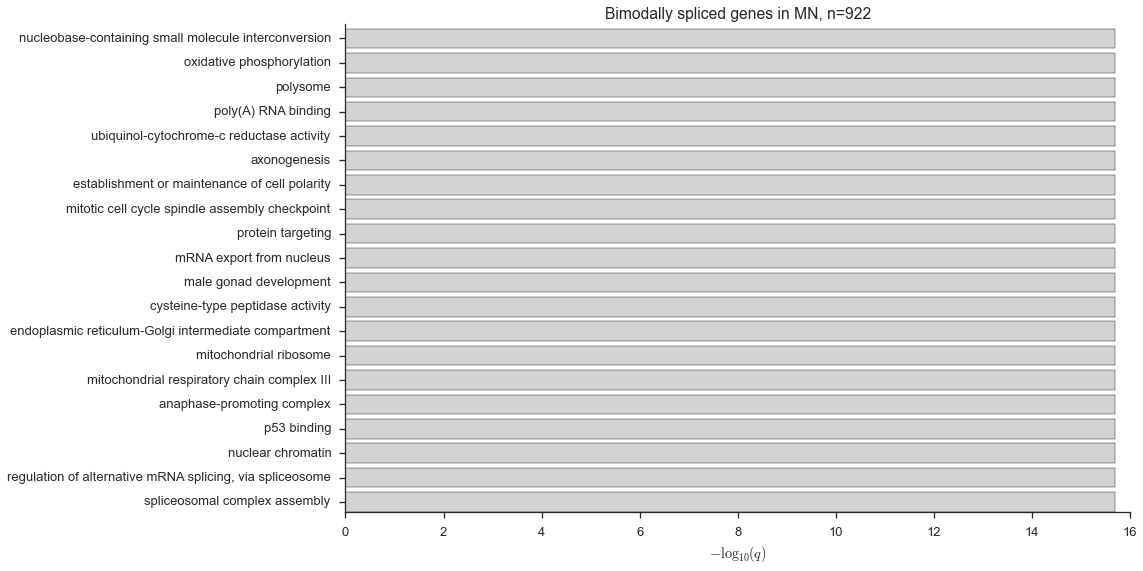

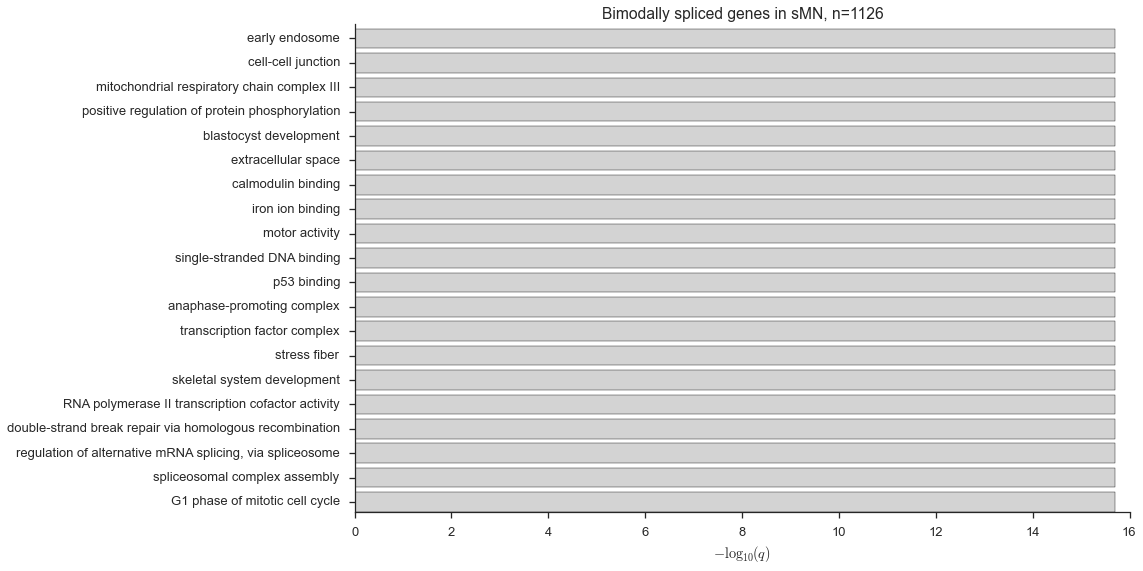

In [311]:
background = pd.Series(list(set(study.splicing.splicing_to_expression_id(ever_bimodal.event_name))))
background.to_csv('{}/bimodally_spliced_genes_go_enrichment_ever_bimodal_background.csv'.format(folder), 
                  index=False)
print len(background)

go_dfs = []

for phenotype, phenotype_df in ever_bimodal.groupby('phenotype'):
    bimodal_df = phenotype_df.loc[phenotype_df.modality == 'bimodal']
    genes = pd.Series(list(set(study.splicing.splicing_to_expression_id(bimodal_df.event_name))))
    prefix = '{}/bimodally_spliced_genes_ever_bimodal_go_enrichment_{}'.format(folder, phenotype)
    genes.to_csv('{}.csv'.format(prefix))
    
    go = study.go_enrichment(genes, background, p_value_cutoff=1e-5, min_feature_size=5, min_background_size=5)
    go_dfs.append(go)
    print go.shape
    if not go is None and not go.empty:
        fig, ax = plt.subplots(figsize=(16, 8))
        plot_go_enrichment(data=go, max_categories=20, color='lightgrey')

        print go.head()
        ax.set_title('{}, n={}'.format('Bimodally spliced genes in {}'.format(phenotype), len(genes)))
        fig = plt.gcf()
        fig.tight_layout()
        fig.savefig('{}.pdf'.format(prefix))
    else:
        print '\t... empty GO enrichment!', phenotype
go_df = pd.concat(go_dfs, ignore_index=True)

#### GO enrichment of transiently bimodal events 

1343
(9, 9)
                              features_of_interest_in_go_term  \
GO:0006936  ENSG00000092841,ENSG00000143549,ENSG0000014393...   
GO:0030176  ENSG00000114902,ENSG00000168000,ENSG0000012677...   
GO:0030308  ENSG00000204628,ENSG00000074800,ENSG0000006874...   
GO:0042274  ENSG00000115268,ENSG00000137154,ENSG0000010519...   
GO:0048306  ENSG00000108654,ENSG00000067715,ENSG0000014393...   

           features_of_interest_in_go_term_gene_symbols           go_domain  \
GO:0006936                  MYL6,TPM3,CALM2,CALM1,MYL6B  biological_process   
GO:0030176            SPCS1,BSCL2,KTN1,TMEM66,TECR,RTN4  cellular_component   
GO:0030308                 GNB2L1,ENO1,IP6K2,RTN4,DDX3X  biological_process   
GO:0042274            RPS15,RPS6,RPS16,RPS24,RPS7,RPS19  biological_process   
GO:0048306                DDX5,SYT1,CALM2,TSG101,SEC31A  molecular_function   

                                               go_name  \
GO:0006936                          muscle contraction   
GO:003

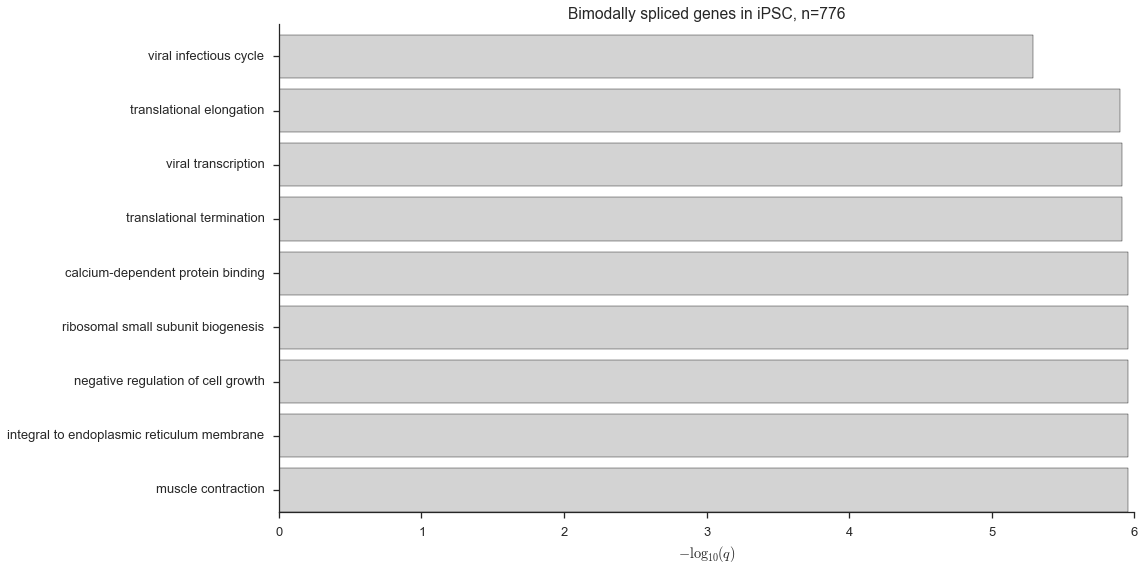

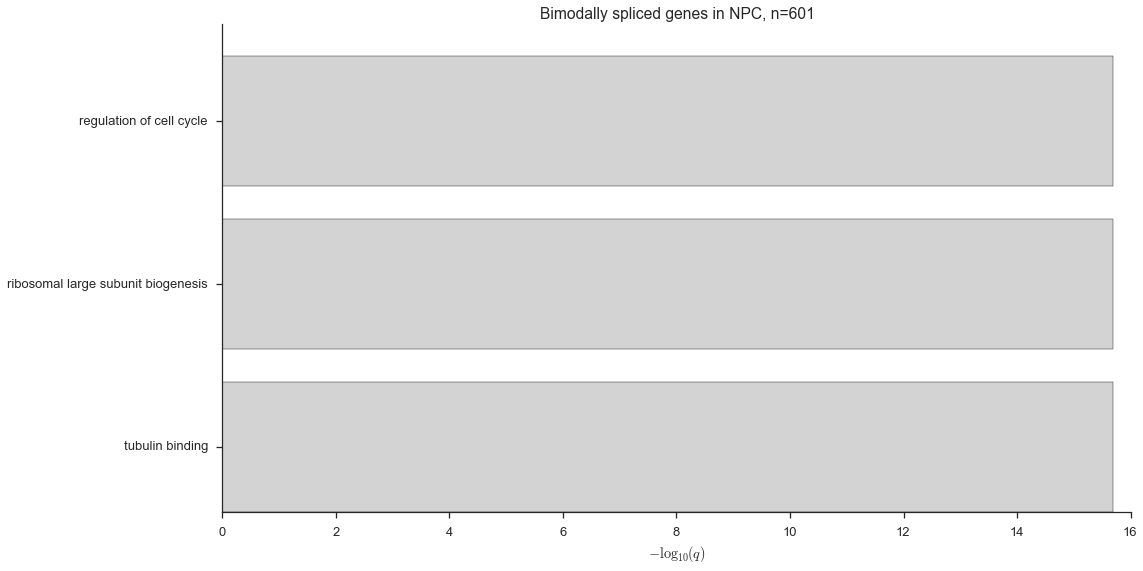

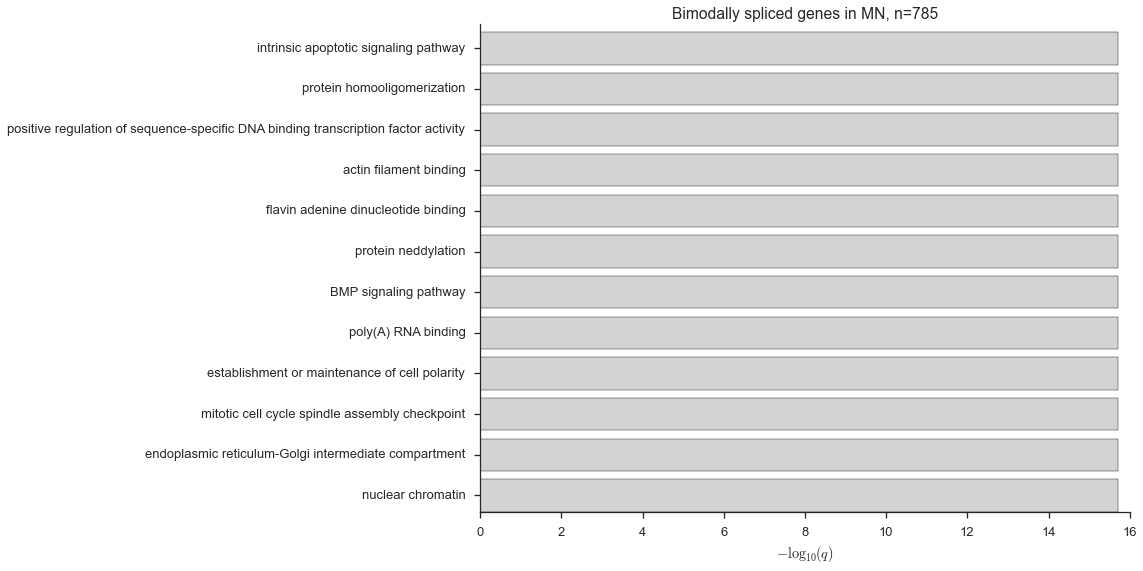

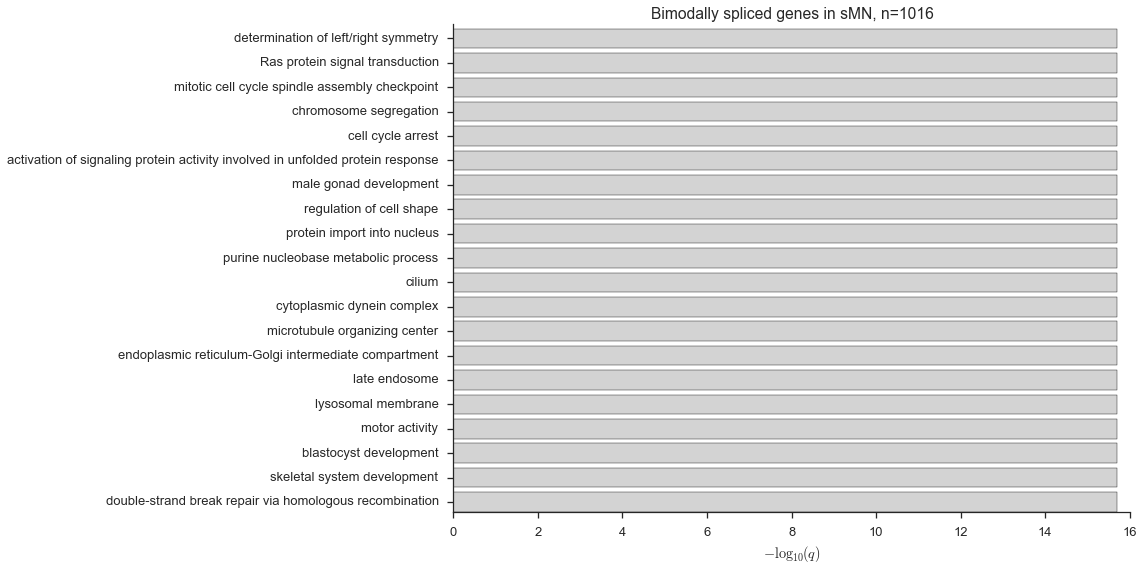

In [312]:
background = pd.Series(list(set(study.splicing.splicing_to_expression_id(ever_bimodal.event_name))))
background.to_csv('{}/bimodally_spliced_genes_go_enrichment_ever_bimodal_background.csv'.format(folder), 
                  index=False)
print len(background)

go_dfs = []

for phenotype, phenotype_df in once_bimodal.groupby('phenotype'):
    bimodal_df = phenotype_df.loc[phenotype_df.modality == 'bimodal']
    genes = pd.Series(list(set(study.splicing.splicing_to_expression_id(bimodal_df.event_name))))
    prefix = '{}/bimodally_spliced_genes_once_bimodal_go_enrichment_{}'.format(folder, phenotype)
    genes.to_csv('{}.csv'.format(prefix))
    
    
    go = study.go_enrichment(genes, background, p_value_cutoff=1e-5, min_feature_size=5, min_background_size=5)
    go_dfs.append(go)
    print go.shape
    if not go is None and not go.empty:
        fig, ax = plt.subplots(figsize=(16, 8))
        plot_go_enrichment(data=go, max_categories=20, color='lightgrey')

        print go.head()
        ax.set_title('{}, n={}'.format('Bimodally spliced genes in {}'.format(phenotype), len(genes)))
        fig = plt.gcf()
        fig.tight_layout()
        fig.savefig('{}.pdf'.format(prefix))
    else:
        print '\t... empty GO enrichment!', phenotype
go_df = pd.concat(go_dfs, ignore_index=True)

### Voyage space

In [97]:
%time nmf_space_postions = study.nmf_space_positions()

CPU times: user 1min 43s, sys: 329 ms, total: 1min 43s
Wall time: 1min 43s


In [110]:
nmf_positions_tidy = nmf_space_postions.reset_index()
nmf_positions_tidy = nmf_positions_tidy.rename(columns={'level_0': 'event_name'})
nmf_positions_tidy.head()

,event_name,phenotype,pc_1,pc_2
0,chr10:101476219-101480743:-|3p,MN,0.076820,0.004318
1,chr10:101476219-101480743:-|3p,NPC,0.068981,0.013578
2,chr10:101476219-101480743:-|3p,iPSC,0.071298,0.000024
3,chr10:101476219-101480743:-|5p,MN,0.076820,0.004318
4,chr10:101476219-101480743:-|5p,NPC,0.068981,0.013578


In [132]:
phenotype_transitions = [('iPSC', 'NPC'), ('iPSC', 'MN'), ('NPC', 'MN'), ('MN', 'sMN')]
%time nmf_space_distances = study.nmf_space_transitions(phenotype_transitions=phenotype_transitions)

CPU times: user 2min 12s, sys: 252 ms, total: 2min 12s
Wall time: 2min 12s


In [133]:
nmf_distances_tidy = nmf_space_distances.unstack().reset_index()
nmf_distances_tidy = nmf_distances_tidy.rename(columns={'level_0': 'transition', 'level_1': 'event_name', 0:'distance'})
nmf_distances_tidy.head()

,transition,event_name,distance
0,"(iPSC, NPC)",chr10:101476219-101480743:-|3p,0.013750
1,"(iPSC, NPC)",chr10:101476219-101480743:-|5p,0.013751
2,"(iPSC, NPC)",chr10:101478258-101480743:-|3p,0.011737
3,"(iPSC, NPC)",chr10:101478258-101480743:-|5p,0.017792
4,"(iPSC, NPC)",chr10:101486829-101487197:-|3p,0.004092


In [134]:
nmf_distances_tidy['transition'] = nmf_distances_tidy.transition.map(lambda x: '-'.join(x))
nmf_distances_tidy.head()

,transition,event_name,distance
0,iPSC-NPC,chr10:101476219-101480743:-|3p,0.013750
1,iPSC-NPC,chr10:101476219-101480743:-|5p,0.013751
2,iPSC-NPC,chr10:101478258-101480743:-|3p,0.011737
3,iPSC-NPC,chr10:101478258-101480743:-|5p,0.017792
4,iPSC-NPC,chr10:101486829-101487197:-|3p,0.004092


In [135]:
cols = ['event_name', 'phenotype']
nmf_positions_modalities = nmf_positions_tidy.merge(study.supplemental.modalities_tidy, left_on=cols, right_on=cols)
nmf_positions_modalities.head()

,event_name,phenotype,pc_1,pc_2,modality
0,chr10:101476219-101480743:-|3p,MN,0.076820,0.004318,~0
1,chr10:101476219-101480743:-|3p,NPC,0.068981,0.013578,bimodal
2,chr10:101476219-101480743:-|3p,iPSC,0.071298,0.000024,~0
3,chr10:101476219-101480743:-|5p,MN,0.076820,0.004318,~0
4,chr10:101476219-101480743:-|5p,NPC,0.068981,0.013578,bimodal


/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_stressed/nmf_positions_sMN.png


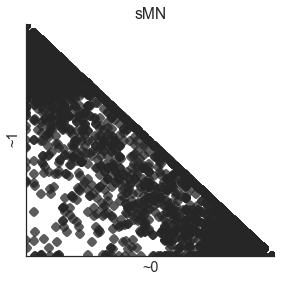

In [251]:
from modish.visualize import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR
import matplotlib as mpl

order = MODALITY_ORDER[:-1]

# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_nmf'

for phenotype, phenotype_df in nmf_positions_modalities.groupby('phenotype'):
    if phenotype != 'sMN':
        continue
    fig, ax = plt.subplots(figsize=(4, 4))
    
    xmax = 0
    ymax = 0
    
#     for modality, modality_df in phenotype_df.groupby('modality'):
    x = phenotype_df.pc_1
    y = phenotype_df.pc_2
    xmax = max(x.max(), xmax)
    ymax = max(y.max(), ymax)
    ax.plot(x, y, 'o', color='#262626', alpha=0.75)
    png = '{}/nmf_positions_{}.png'.format(folder, phenotype)
    print png
    ax.legend(ncol=2, columnspacing=.5)
    sns.despine()
    ax.set(xlabel='~0', ylabel='~1', xticks=[], yticks=[], ylim=(0, 1.01*ymax), xlim=(0, 1.01*xmax), title=phenotype)
    fig.tight_layout()
    fig.savefig(png, dpi=150)

/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_stressed/nmf_positions_modalities_sMN.png


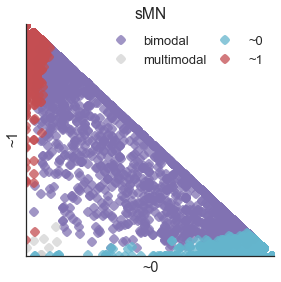

In [252]:
from modish.visualize import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR
import matplotlib as mpl

order = MODALITY_ORDER[:-1]

# folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure5_nmf'

for phenotype, phenotype_df in nmf_positions_modalities.groupby('phenotype'):
    if phenotype != 'sMN':
        continue
    
    fig, ax = plt.subplots(figsize=(4, 4))
    
    xmax = 0
    ymax = 0
    
    for modality, modality_df in phenotype_df.groupby('modality'):
        x = modality_df.pc_1
        y = modality_df.pc_2
        xmax = max(x.max(), xmax)
        ymax = max(y.max(), ymax)
        ax.plot(x, y, 'o', color=MODALITY_TO_COLOR[modality], alpha=0.75, label=modality)
    png = '{}/nmf_positions_modalities_{}.png'.format(folder, phenotype)
    print png
    ax.legend(ncol=2, columnspacing=.5)
    sns.despine()
    ax.set(xlabel='~0', ylabel='~1', xticks=[], yticks=[], ylim=(0, 1.01*ymax), xlim=(0, 1.01*xmax), title=phenotype)
    fig.tight_layout()
    fig.savefig(png, dpi=150)

### Plot distances with cutoff

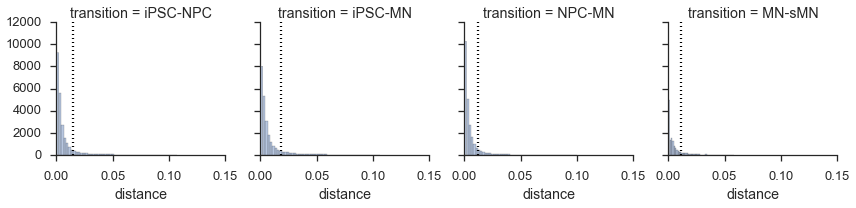

In [139]:
def mean_std_cutoff(x, **kwargs):
    ax = plt.gca()
    cutoff_func = kwargs.pop('cutoff_func')
    cutoff = cutoff_func(x)
    ymin, ymax = ax.get_ylim()
    ax.vlines(cutoff, ymin, ymax, linestyle='dotted')
    
def annotate_event(*args, **kwargs):
    event_description = kwargs.pop('event_description')
    event_name = kwargs.pop('event_name')
    data = kwargs.pop('data')
    event_position = data.distance[data.event_name == event_name]
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    yrange = ymax - ymin
    ax.annotate(event_description, xy=(event_position, ymin+yrange*.01), 
                xytext=(event_position, ymin+yrange*.5), xycoords='data', 
                textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', linewidth=2),
               ha='center', fontsize=12)
    
def cutoff_function(x):
    return x.mean() + x.std()

g = sns.FacetGrid(nmf_distances_tidy, col='transition')
g.map(sns.distplot, 'distance', kde=False)
g.map(mean_std_cutoff, 'distance', cutoff_func=cutoff_function)
# g.map_dataframe(annotate_event, event_description='PKM MXE\nevent', event_name=pkm_event)
for ax in g.axes.flat:
    ax.locator_params('x', nbins=4)
g.savefig('{}/voyage_distances_hist_cutoff.pdf'.format(folder))

### Get direction of change

In [136]:
def voyage_direction(row, transition):
    row.index = row.index.droplevel(1)
    phenotype1, phenotype2 = transition
    try:
        x1, y1 = row.loc[phenotype1].values
        x2, y2 = row.loc[phenotype2].values
        dx = x2 - x1
        dy = y2 - y1
        if dx > 0 and dy > 0:
            # bimodal
            return r'$\nearrow$'
        elif dx > 0 and dy <= 0:
            # towards ~0
            return r'$\searrow$'
        elif dx <= 0 and dy > 0:
            # towards ~1
            return r'$\nwarrow$'
        elif dx < 0 and dy < 0:
            # Towards middle
            return r'$\swarrow$'
        else:
            return np.nan
    except KeyError:
        return np.nan    

dfs = []

nmf_positions_tidy_index = nmf_positions_tidy.set_index(['phenotype', 'event_name'])
for transition in phenotype_transitions:
    df = nmf_positions_tidy_index.groupby(level=1, axis=0).apply(voyage_direction, transition=transition).reset_index()
    df = df.rename(columns={0: 'direction', 'index': 'event_name'})
    df['transition'] = '-'.join(transition)
    dfs.append(df)
voyage_directions = pd.concat(dfs)
voyage_directions.head()

,event_name,direction,transition
0,chr10:101476219-101480743:-|3p,$\nwarrow$,iPSC-NPC
1,chr10:101476219-101480743:-|5p,$\nwarrow$,iPSC-NPC
2,chr10:101478258-101480743:-|3p,$\searrow$,iPSC-NPC
3,chr10:101478258-101480743:-|5p,$\searrow$,iPSC-NPC
4,chr10:101486829-101487197:-|3p,$\nwarrow$,iPSC-NPC


In [137]:
voyage_data = nmf_distances_tidy.merge(voyage_directions, left_on=['event_name', 'transition'],
                              right_on=['event_name', 'transition'])
voyage_data.head()

,transition,event_name,distance,direction
0,iPSC-NPC,chr10:101476219-101480743:-|3p,0.013750,$\nwarrow$
1,iPSC-NPC,chr10:101476219-101480743:-|5p,0.013751,$\nwarrow$
2,iPSC-NPC,chr10:101478258-101480743:-|3p,0.011737,$\searrow$
3,iPSC-NPC,chr10:101478258-101480743:-|5p,0.017792,$\searrow$
4,iPSC-NPC,chr10:101486829-101487197:-|3p,0.004092,$\nwarrow$


### Barplot of directions

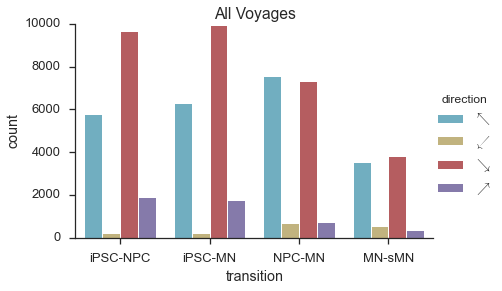

In [142]:
from modish.visualize import MODALITY_PALETTE, MODALITY_ORDER
modality_order = MODALITY_ORDER

modality_to_arrows = {'~0': r'$\nwarrow$', '~1': r'$\searrow$', 'middle': r'$\swarrow$', 'bimodal': r'$\nearrow$',
                     'multimodal': '.'}
arrow_order = [modality_to_arrows[x] for x in modality_order]
arrow_colors = dict(zip(arrow_order, MODALITY_PALETTE))

g = sns.factorplot(x='transition', hue='direction', data=voyage_data, kind='count', hue_order=arrow_order[:-1],
              palette=arrow_colors, linewidth=1, edgecolor='white', aspect=1.5)
for ax in g.axes.flat:
    ax.locator_params('y', nbins=5)
    ax.set_title('All Voyages')
g.savefig('{}/voyage_directions_count_barplot.pdf'.format(folder))

### Plot arrows of direction changes

In [173]:
def plot_nmf_positions(*args, **kwargs):
    data = kwargs.pop('data')
    ax = plt.gca()
    phenotype1, phenotype2 = data.transition.values[0].split('-')
    print phenotype1, phenotype2
    
    # PLot a phantom line for the legend to work
    ax.plot(0, 0, **kwargs)
    for event in data.event_name:
        df = nmf_space_postions.ix[event].ix[[phenotype1, phenotype2]].dropna()
        if df.shape[0] != 2:
            continue
        x1, x2 = df.pc_1.values
        y1, y2 = df.pc_2.values
        dx = x2 - x1
        dy = y2 - y1
        ax.arrow(x1, y1, dx, dy, head_width=0.005, head_length=0.005, #fc='k', ec='k', 
                 alpha=0.25, **kwargs)

In [ ]:
g = sns.FacetGrid(voyage_data, col='direction', row='transition', size=4, margin_titles=True)
g.map_dataframe(plot_nmf_positions, 'event_name')
xmax = nmf_space_postions.pc_1.max()*1.05
ymax = nmf_space_postions.pc_2.max()*1.05
g.set(xlim=(0, xmax), ylim=(0, ymax), xlabel='~1', ylabel='~0', xticks=[], yticks=[])
g.savefig('{}/transition_arrows_all.pdf'.format(folder))

### Big voyages

In [145]:
big_voyages = voyage_data.groupby('transition', as_index=False, group_keys=False).apply(
    lambda x: x.ix[x.distance > (x.distance.mean() + x.distance.std())])
big_voyages.head()

,transition,event_name,distance,direction
70163,MN-sMN,chr10:102035248-102039880:-|3p,0.013933,$\nwarrow$
70164,MN-sMN,chr10:102035248-102039880:-|5p,0.020840,$\nwarrow$
70167,MN-sMN,chr10:102035251-102039880:-|3p,0.016158,$\searrow$
70193,MN-sMN,chr10:102286832-102289122:-|3p,0.021910,$\nwarrow$
70251,MN-sMN,chr10:103917313-103917805:+|3p,0.011861,$\searrow$


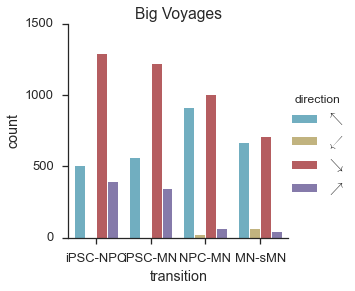

In [152]:
g = sns.factorplot(x='transition', hue='direction', data=big_voyages, kind='count', hue_order=arrow_order[:-1],
              palette=arrow_colors, linewidth=1, edgecolor='white', x_order=['iPSC-NPC', 'iPSC-MN', 'NPC-MN', 'MN-sMN'])
for ax in g.axes.flat:
    ax.locator_params('y', nbins=5)
    ax.set(title="Big Voyages")
g.savefig('{}/voyage_directions_count_barplot_big.pdf'.format(folder))

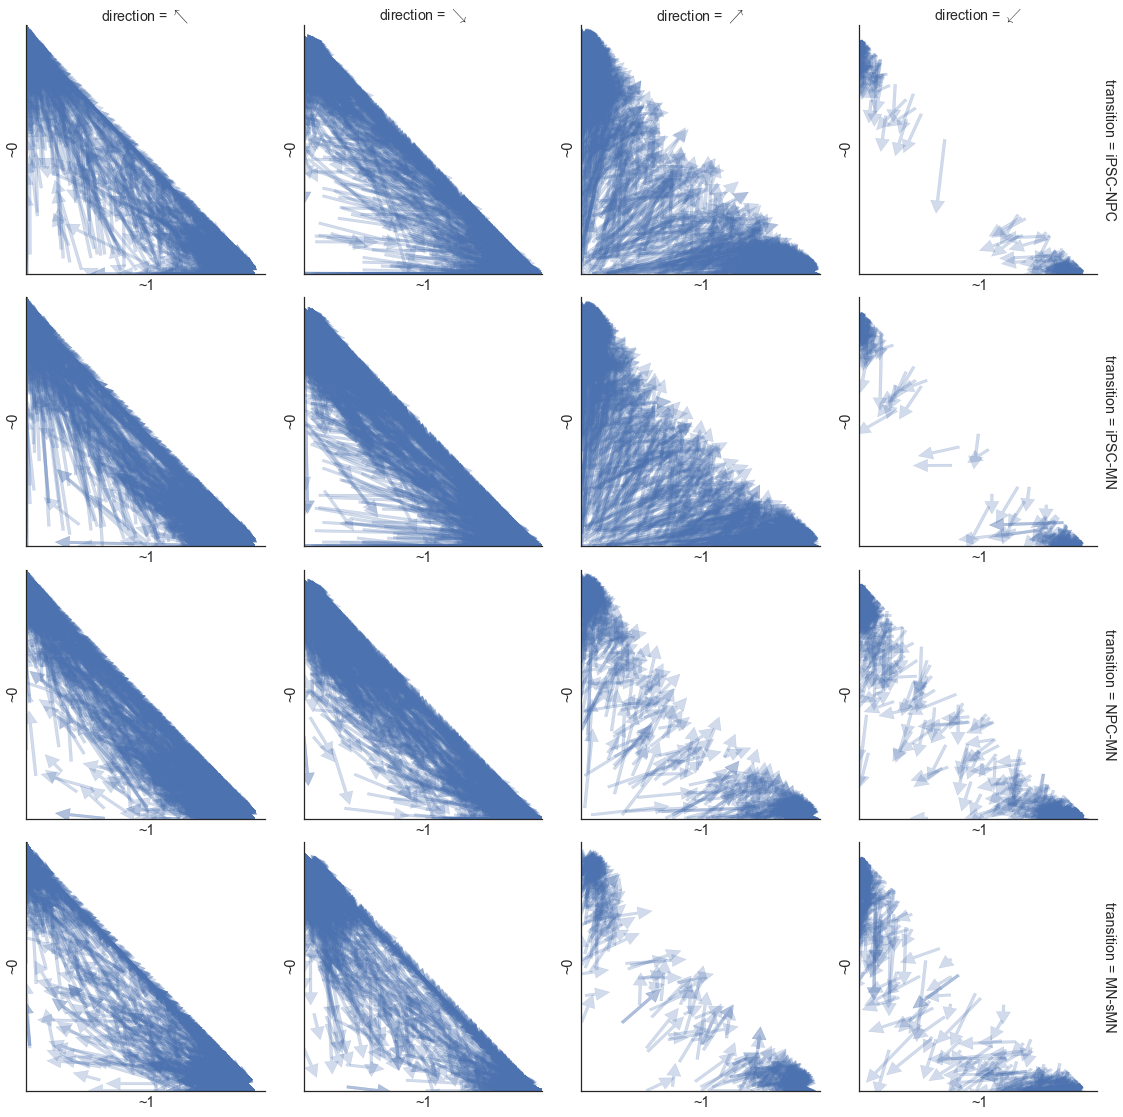

In [156]:
g = sns.FacetGrid(voyage_data, col='direction', row='transition', size=4, margin_titles=True)
g.map_dataframe(plot_nmf_positions, 'event_name')
xmax = nmf_space_postions.pc_1.max()*1.05
ymax = nmf_space_postions.pc_2.max()*1.05
g.set(xlim=(0, xmax), ylim=(0, ymax), xlabel='~1', ylabel='~0', xticks=[], yticks=[])
g.savefig('{}/transition_arrows_all.pdf'.format(folder))


## MN to sMN: Venn of changing splicing measured by PCA, $\Delta$ Modality and `bon voyage`

In [154]:
modalities_mn_smn = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.phenotype.isin(('MN', 'sMN'))]

delta_modality = modalities_mn_smn.groupby('event_name').filter(lambda x: x.modality.unique().shape[0] > 1)
delta_modality.head()

,event_name,phenotype,modality
0,chr10:101476219-101480743:-|3p,MN,~0
3,chr10:101476219-101480743:-|5p,MN,~0
6,chr10:101478258-101480743:-|3p,MN,~1
9,chr10:101478258-101480743:-|5p,MN,~1
12,chr10:101486829-101487197:-|3p,MN,~0


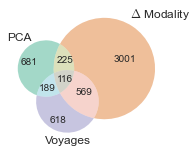

In [155]:
import matplotlib_venn

voyage_events = set(big_voyages.loc[big_voyages.transition == 'MN-sMN'].event_name)
delta_modality_events = set(delta_modality.event_name)
pca_events = set(big_components.index)

fig, ax = plt.subplots(figsize=(2.5, 2.5))

matplotlib_venn.venn3((pca_events, delta_modality_events, voyage_events), 
                      set_labels=('PCA', '$\Delta$ Modality', 'Voyages'),
                      set_colors=sns.color_palette('Dark2', n_colors=3))
fig.tight_layout()
fig.savefig('{}/changing_events_voyage_modality_pca_venn.pdf'.format(folder))

In [159]:
from collections import Counter

changing_event_count = Counter(voyage_events)
changing_event_count.update(delta_modality_events)
changing_event_count.update(pca_events)
changing_event_count = pd.Series(changing_event_count)

tier1_events = changing_event_count.index[changing_event_count > 1]
tier2_events = changing_event_count.index[changing_event_count == 1]

In [161]:
tier1_events

Index([u'chr10:102035248-102039880:-|5p', u'chr10:102046090-102046361:-|3p',
       u'chr10:102286832-102289122:-|3p', u'chr10:103917313-103917805:+|3p',
       u'chr10:103917313-103917805:+|5p', u'chr10:103917972-103918949:+|3p',
       u'chr10:103919066-103919189:+|3p', u'chr10:103919066-103919189:+|5p',
       u'chr10:103919096-103919189:+|3p', u'chr10:112679416-112711365:+|3p', 
       ...
       u'chrX:54842124-54842313:+|5p', u'chrX:77157513-77158139:+|5p',
       u'chrY:14798536-14799613:+|3p', u'chrY:14798536-14802254:+|3p',
       u'chrY:14798536-14802254:+|5p', u'chrY:14813985-14819692:+|3p',
       u'chrY:14813985-14820566:+|5p', u'chrY:14813985-14821320:+|3p',
       u'chrY:14813985-14821320:+|5p', u'chrY:2710015-2710205:+|5p'],
      dtype='object', length=1099)

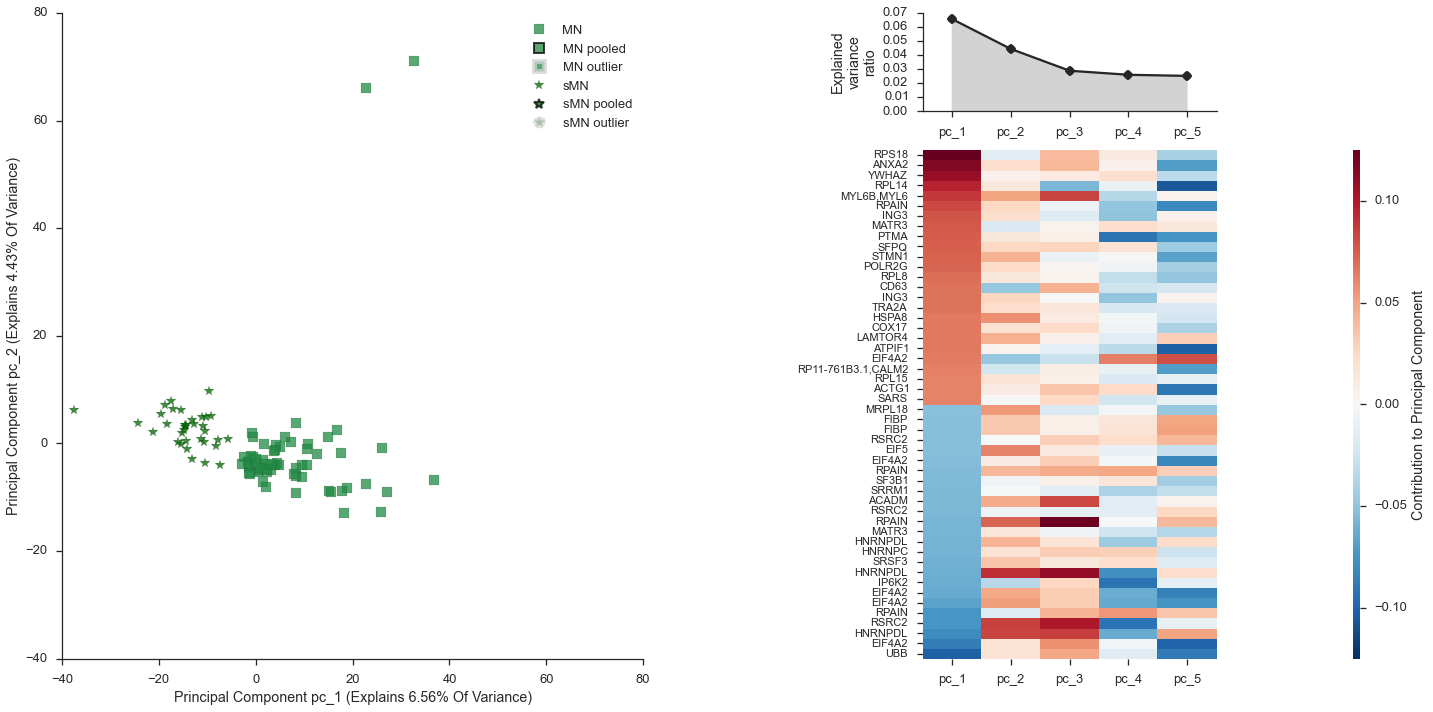

In [162]:
viz = study.plot_pca(feature_subset=tier1_events, data_type='splicing',
                     sample_subset=neuron_singles_ids, show_vectors=False, scale_by_variance=True)
xmin, xmax, ymin, ymax = viz.ax_components.axis()
vmin = min(xmin, ymin)
vmax = max(xmax, ymax)
viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
viz.fig_reduced.savefig('{}/changing_events_voyage_modality_pca_tier1_pca.pdf'.format(folder))


In [164]:
study.splicing.feature_expression_id_col = 'ensembl_id'

(62, 9)
                              features_of_interest_in_go_term  \
GO:0005515  ENSG00000131711,ENSG00000123545,ENSG0000016266...   
GO:0005634  ENSG00000133134,ENSG00000106245,ENSG0000016266...   
GO:0005737  ENSG00000133134,ENSG00000173933,ENSG0000021352...   
GO:0005829  ENSG00000243678,ENSG00000114956,ENSG0000020484...   
GO:0010467  ENSG00000115524,ENSG00000164924,ENSG0000017031...   

                 features_of_interest_in_go_term_gene_symbols  \
GO:0005515  MAP1B,NDUFAF4,ZNF326,KMT2E,RBM4,FUBP1,XRN2,U2S...   
GO:0005634  BEX2,BUD31,ZNF326,TRA2A,RP11-463D19.2,RBM4,FUB...   
GO:0005737  BEX2,RBM4,SRA1,DGUOK,WDR61,HMGCS1,DCTN1,NGFRAP...   
GO:0005829  NME1-NME2,DGUOK,DCTN1,NGFRAP1,RPS18,RPL11,STRA...   
GO:0010467  SF3B1,YWHAZ,UBB,EIF3K,RPS29,SRSF7,PSMC4,EXOSC8...   

                     go_domain          go_name  n_background_in_go_term  \
GO:0005515  molecular_function  protein binding                      837   
GO:0005634  cellular_component          nucleus           

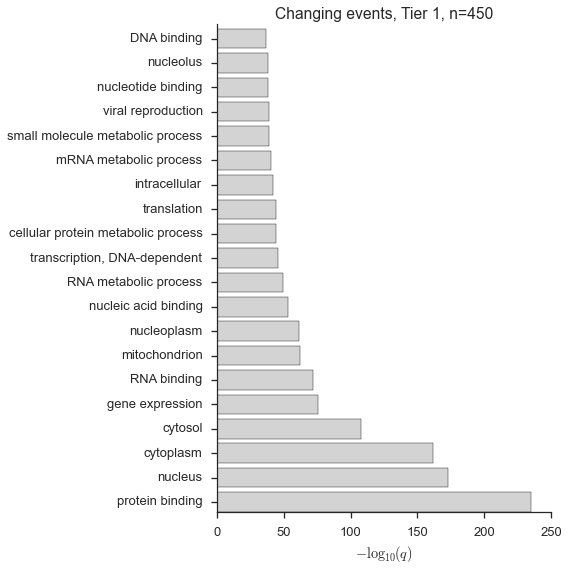

In [268]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

background = study.splicing.splicing_to_expression_id(voyage_data.event_name.unique())
# background = pd.Series(np.unique(background))
# background.to_csv('{}/changing_events_background_ensembl.csv'.format(folder), index=False)
# background_genes = study.expression.feature_data.gene_name[background]
# background_genes.to_csv('{}/changing_events_background_genes.csv'.format(folder), index=False)

tier1_genes = study.splicing.splicing_to_expression_id(tier1_events)
tier1_genes = pd.Series(np.unique(tier1_genes))
tier1_genes.to_csv('{}/changing_events_tier1_genes.csv'.format(folder), index=False)


go = study.go_enrichment(tier1_genes, background, p_value_cutoff=1e-5, min_feature_size=15, min_background_size=15)
print go.shape
if not go is None and not go.empty:
    fig, ax = plt.subplots(figsize=(8, 8))
#     go = go.loc[go.n_background_in_go_term != go.n_features_of_interest_in_go_term]
    plot_go_enrichment(data=go, max_categories=20, color='lightgrey')
    prefix = '{}/changing_events_go_enrichment_tier1'.format(folder)

    print go.head()
    ax.set_title('{}, n={}'.format('Changing events, Tier 1', len(tier1_genes)))
    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}.pdf'.format(prefix))
else:
    print '\t... empty GO enrichment!'


In [176]:
voyages_tier1 = voyage_data.loc[voyage_data.event_name.isin(tier1_events) & (voyage_data.transition == 'MN-sMN')]

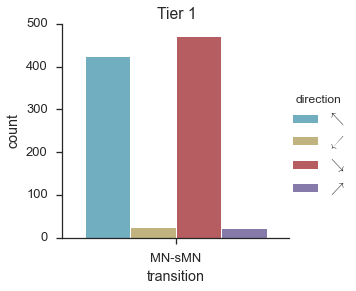

In [177]:
g = sns.factorplot(x='transition', hue='direction', data=voyages_tier1, kind='count', hue_order=arrow_order[:-1],
              palette=arrow_colors, linewidth=1, edgecolor='white', x_order=['MN-sMN'])
for ax in g.axes.flat:
    ax.locator_params('y', nbins=5)
    ax.set(title='Tier 1')
g.savefig('{}/voyage_directions_count_barplot_tier1.pdf'.format(folder))

MN sMN
MN sMN
MN sMN
MN sMN


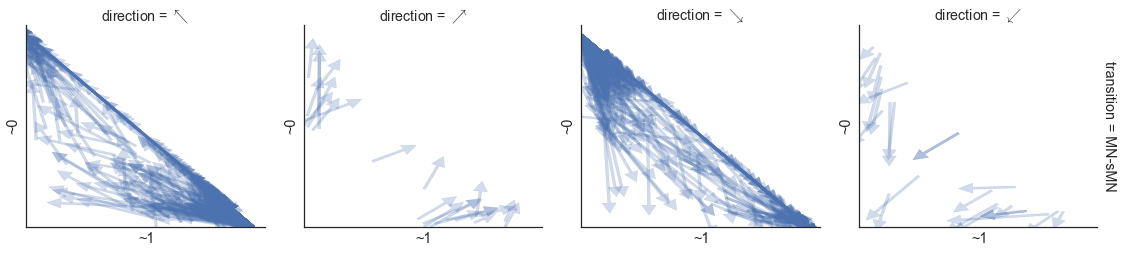

In [178]:
g = sns.FacetGrid(voyages_tier1, col='direction', row='transition', row_order=['MN-sMN'], size=4, margin_titles=True)
g.map_dataframe(plot_nmf_positions, 'event_name')
xmax = nmf_space_postions.pc_1.max()*1.05
ymax = nmf_space_postions.pc_2.max()*1.05
g.set(xlim=(0, xmax), ylim=(0, ymax), xlabel='~1', ylabel='~0', xticks=[], yticks=[])
g.savefig('{}/transition_arrows_tier1.pdf'.format(folder))